Importing Libraries

In [1]:
import tensorflow as tf 
from tensorflow import keras
from sklearn.model_selection import train_test_split #-> to split the dataset 
import pandas as pd
import numpy as np 
from PIL import Image
from natsort import natsorted, ns 
import glob #Importing glob library -> for file access purpose
from tqdm.notebook import tqdm 
import os 
import matplotlib.pyplot as plt #plot graphs 
import seaborn as sns
from sklearn import metrics 
from sklearn.metrics import classification_report 

To check GPU Details 

In [2]:
from tensorflow.python.client import  device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3358698348216150653
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3599024066005175402
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

To  mount google drive 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading images in form of array

In [4]:
def get_arrays():
  X = []
  Y = []
  cls = []
  datapath = "/content/drive/MyDrive/BarkVN-50_mendeley"
  datapath_list = sorted(os.listdir(datapath))
  i = 0
  for subdir in datapath_list:
    print(subdir)
    cls.append(subdir)
    if i>49:  #50 is the number of classes
      break
    subdir_path = os.path.join(datapath, subdir)
    subdir_path = os.path.join(subdir_path, '*JPG')
    files = glob.glob(subdir_path)
    files = natsorted(files, key = lambda x: x.lower()) #Ascending sort
    for f in tqdm(files):
      np_img = np.asarray(Image.open(f).resize((224,224)))
      #np_img_new = np_img/255
      X.append(np_img)
      Y.append(i) 
    i = i+1
  X = np.asarray(X)
  Y = np.asarray(Y)
  return X, Y,cls

In [5]:
X,Y,cls= get_arrays()

Acacia


  0%|          | 0/102 [00:00<?, ?it/s]

Adenanthera microsperma


  0%|          | 0/80 [00:00<?, ?it/s]

Adenium species


  0%|          | 0/144 [00:00<?, ?it/s]

Anacardium occidentale


  0%|          | 0/239 [00:00<?, ?it/s]

Annona squamosa


  0%|          | 0/105 [00:00<?, ?it/s]

Artocarpus altilis


  0%|          | 0/104 [00:00<?, ?it/s]

Artocarpus heterophyllus


  0%|          | 0/138 [00:00<?, ?it/s]

Barringtonia acutangula


  0%|          | 0/102 [00:00<?, ?it/s]

Cananga odorata


  0%|          | 0/101 [00:00<?, ?it/s]

Carica papaya


  0%|          | 0/207 [00:00<?, ?it/s]

Casuarina equisetifolia


  0%|          | 0/97 [00:00<?, ?it/s]

Cedrus


  0%|          | 0/93 [00:00<?, ?it/s]

Chrysophyllum cainino


  0%|          | 0/111 [00:00<?, ?it/s]

Citrus aurantiifolia


  0%|          | 0/108 [00:00<?, ?it/s]

Citrus grandis


  0%|          | 0/84 [00:00<?, ?it/s]

Cocos nucifera


  0%|          | 0/110 [00:00<?, ?it/s]

Dalbergia oliveri


  0%|          | 0/89 [00:00<?, ?it/s]

Delonix regia


  0%|          | 0/103 [00:00<?, ?it/s]

Dipterocarpus alatus


  0%|          | 0/158 [00:00<?, ?it/s]

Erythrina fusca


  0%|          | 0/104 [00:00<?, ?it/s]

Eucalyptus


  0%|          | 0/127 [00:00<?, ?it/s]

Ficus microcarpa


  0%|          | 0/150 [00:00<?, ?it/s]

Ficus racemosa


  0%|          | 0/117 [00:00<?, ?it/s]

Gmelina arborea Roxb


  0%|          | 0/103 [00:00<?, ?it/s]

Hevea brasiliensis


  0%|          | 0/110 [00:00<?, ?it/s]

Hopea


  0%|          | 0/91 [00:00<?, ?it/s]

Khaya senegalensis


  0%|          | 0/95 [00:00<?, ?it/s]

Khaya senegalensis A.Juss


  0%|          | 0/99 [00:00<?, ?it/s]

Lagerstroemia speciosa


  0%|          | 0/96 [00:00<?, ?it/s]

Magnolia alba


  0%|          | 0/92 [00:00<?, ?it/s]

Mangifera


  0%|          | 0/92 [00:00<?, ?it/s]

Melaleuca


  0%|          | 0/107 [00:00<?, ?it/s]

Melia azedarach


  0%|          | 0/103 [00:00<?, ?it/s]

Musa


  0%|          | 0/132 [00:00<?, ?it/s]

Nephelium lappaceum


  0%|          | 0/104 [00:00<?, ?it/s]

Persea


  0%|          | 0/103 [00:00<?, ?it/s]

Polyalthia longifolia


  0%|          | 0/100 [00:00<?, ?it/s]

Prunnus


  0%|          | 0/80 [00:00<?, ?it/s]

Prunus salicina


  0%|          | 0/105 [00:00<?, ?it/s]

Psidium guajava


  0%|          | 0/122 [00:00<?, ?it/s]

Pterocarpus macrocarpus


  0%|          | 0/100 [00:00<?, ?it/s]

Senna siamea


  0%|          | 0/93 [00:00<?, ?it/s]

Spondias mombin L


  0%|          | 0/102 [00:00<?, ?it/s]

Syzygium nervosum


  0%|          | 0/109 [00:00<?, ?it/s]

Tamarindus indica


  0%|          | 0/103 [00:00<?, ?it/s]

Tectona grandis


  0%|          | 0/102 [00:00<?, ?it/s]

Terminalia catappa


  0%|          | 0/113 [00:00<?, ?it/s]

Veitchia merrilli


  0%|          | 0/152 [00:00<?, ?it/s]

Wrightia


  0%|          | 0/97 [00:00<?, ?it/s]

Wrightia religiosa


  0%|          | 0/100 [00:00<?, ?it/s]

spliting  the dataset 

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

# X_train = np.array(X_train).reshape(-1, img_size[0], img_size[1], 3)
# Y_train = np.array(Y_train).reshape(-1,)
# #X_train = ( X_train)/255

# X_test = np.array(X_test).reshape(-1,  img_size[0], img_size[1], 3)
# Y_test = np.array(Y_test).reshape(-1,)
# #X_test = (X_test)/255

In [7]:
print(X_train.shape) # To check shape of input data for the model
print(Y_train.shape)

(5020, 224, 224, 3)
(5020,)


Using pre trained model -- MoblieNetV3Small

In [8]:
base_model = tf.keras.applications.MobileNetV3Small( weights="imagenet",include_top=False,
    input_tensor=None,classes=50,input_shape=(224, 224, 3))

In [9]:
base_model.trainable = False
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
#x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(50, activation='softmax')(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 576)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 50)                28850     
                                                                 
Total params: 967,970
Trainable params: 28,850
Non-trainable params: 939,120
_________________________________________________________________


In [10]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, 
   optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])


history = model.fit(X_train, Y_train, epochs =30, shuffle = True,
                    validation_split=0.10, use_multiprocessing = True)

Epoch 1/30
142/142 [==============================] - 9s 29ms/step - loss: 2.3514 - accuracy: 0.5102 - val_loss: 1.3186 - val_accuracy: 0.7888
Epoch 2/30
142/142 [==============================] - 3s 19ms/step - loss: 0.9740 - accuracy: 0.8459 - val_loss: 0.7865 - val_accuracy: 0.8745
Epoch 3/30
142/142 [==============================] - 3s 19ms/step - loss: 0.6217 - accuracy: 0.9121 - val_loss: 0.5842 - val_accuracy: 0.9104
Epoch 4/30
142/142 [==============================] - 3s 19ms/step - loss: 0.4515 - accuracy: 0.9365 - val_loss: 0.4754 - val_accuracy: 0.9323
Epoch 5/30
142/142 [==============================] - 3s 20ms/step - loss: 0.3544 - accuracy: 0.9529 - val_loss: 0.4067 - val_accuracy: 0.9363
Epoch 6/30
142/142 [==============================] - 3s 23ms/step - loss: 0.2888 - accuracy: 0.9608 - val_loss: 0.3559 - val_accuracy: 0.9402
Epoch 7/30
142/142 [==============================] - 3s 20ms/step - loss: 0.2405 - accuracy: 0.9721 - val_loss: 0.3222 - val_accuracy: 0.9522

Accuracy Graph

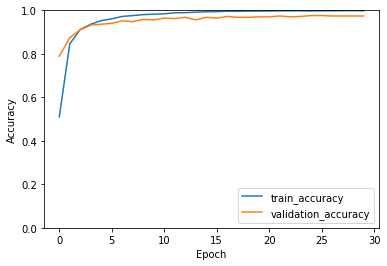

In [11]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Loss graph

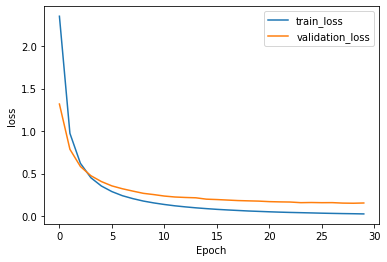

In [12]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')
plt.show()

Test accuary and F1 Score

18/18 - 1s - loss: 0.1251 - accuracy: 0.9606 - 650ms/epoch - 36ms/step
test accuracy = 96.05734767025089 %

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        18
           6       1.00      0.94      0.97        16
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        10
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         7
          14       0.89      1.00      0.94         8
          15       1.00    

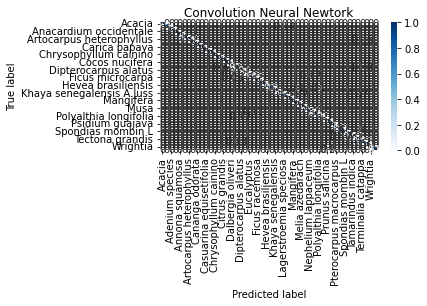

In [14]:

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
Y_te = np.array(tf.math.argmax(model.predict(X_test), 1))
cm = tf.math.confusion_matrix(Y_test, Y_te)


acc = metrics.accuracy_score(Y_test, Y_te)
print("test accuracy =", acc*100,"%\n")

print(classification_report(Y_test, Y_te))

con_mat = tf.math.confusion_matrix(labels=Y_test, predictions=Y_te).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes = cls
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure()
sns.heatmap(con_mat_df, annot=True, cmap="Blues")
plt.tight_layout()
plt.title('Convolution Neural Newtork')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()